# Proyek Analisis Data: Nama dataset
- Nama: Salsabila Zahirah / Ira Salsabila
- Email: irasalsabila@gmail.com
- Id Dicoding: [irasalsabila](https://www.dicoding.com/users/irasalsabila/)

## Menentukan Pertanyaan Bisnis

**Relevant:**
- Apa hubungan suhu (temp) dengan jumlah pengguna biasa (casual) dan jumlah pengguna yang sudah terigistrasi (registered) pada setiap musim?
- Apa pengaruh humidity, temperature, dan windspeed terhadap jumlah sewa sepeda (cnt) setiap hari Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, dan Minggu?

## Menyiapkan semua library yang dibutuhkan

In [4]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

import warnings

## Data Wrangling

### Gathering Data

In [5]:
df_day = pd.read_csv("dataset/day.csv")
display("this is df_day: ", df_day)

df_hour = pd.read_csv("dataset/hour.csv")
display("this is df_hour: ", df_hour)

'this is df_day: '

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


'this is df_hour: '

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [6]:
# Printing datatype information of the df_day DataFrame
print('Dataframe day - Datatype Information:')
print(df_day.info())

# Checking for duplicated entries in df_day
print('Dataframe day - Duplicated Entries:', df_day.duplicated().sum())

# Displaying descriptive statistics of df_day
display(df_day.describe())

Dataframe day - Datatype Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
Dataframe day - Duplicated Entries: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
# Printing datatype information of the df_hour DataFrame
print('Dataframe day - Datatype Information:')
print(df_hour.info())

# Checking for duplicated entries in df_hour
print('Dataframe day - Duplicated Entries:', df_hour.duplicated().sum())

# Displaying descriptive statistics of df_hour
display(df_hour.describe())


Dataframe day - Datatype Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
Datafr

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [8]:
## Converting "dteday" column to datetime ##
# df_day
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
# df_hour
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

# Checking the data type after conversion for df_day and df_hour
print('Data type of df_day["dteday"]: ', df_day["dteday"].dtypes)
print('Data type of df_hour["dteday"]: ', df_hour["dteday"].dtypes)

Data type of df_day["dteday"]:  datetime64[ns]
Data type of df_hour["dteday"]:  datetime64[ns]


## Exploratory Data Analysis (EDA)

> Correlation of all variables

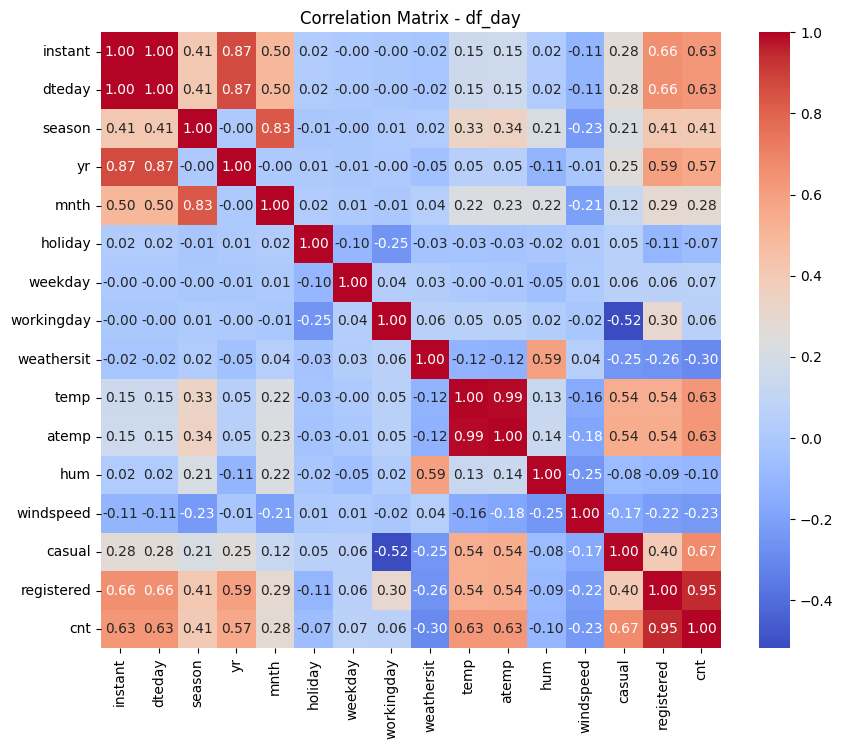

In [9]:
# Generating the correlation matrix for df_day
correlation_matrix = df_day.corr()

# Visualizing the correlation matrix as a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - df_day')
plt.show()

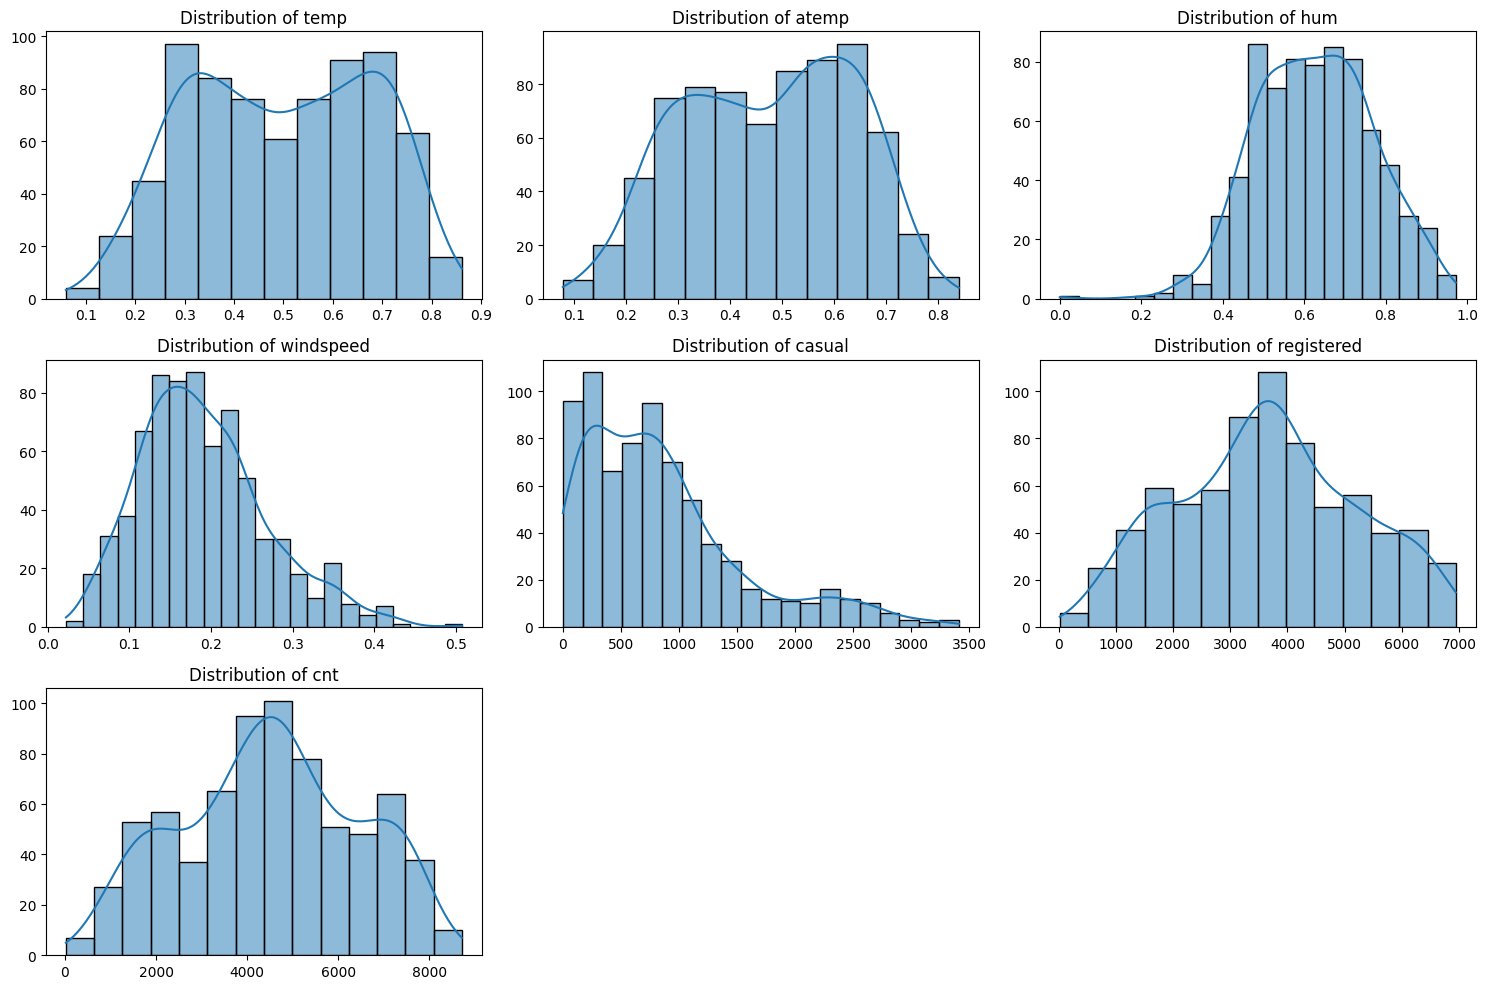

In [10]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Define the number of columns and rows in the grid
num_cols = 3  # Number of columns for the grid
num_rows = (len(numeric_cols) - 1) // num_cols + 1  # Number of rows based on columns

# Create subplots for the histograms in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array to easily iterate through all subplots
axes = axes.flatten()

# Plot each numeric column as a histogram
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.histplot(df_day[col], ax=ax, kde=True, bins='auto')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide extra subplots if there are any
for i in range(len(numeric_cols), num_cols * num_rows):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


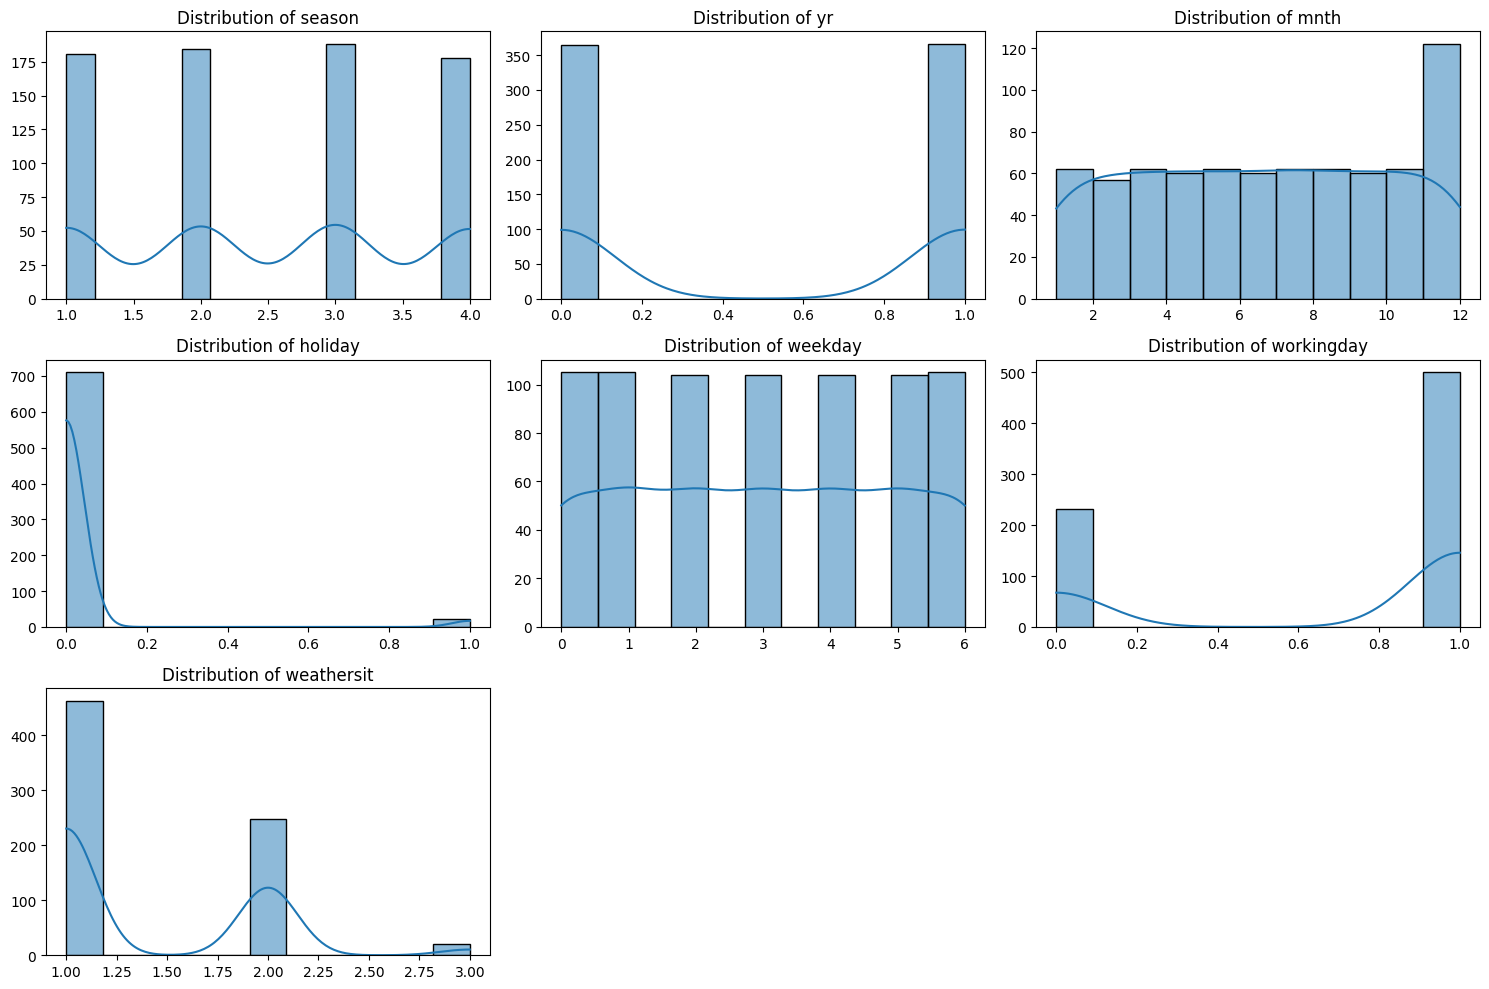

In [13]:
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Define the number of columns and rows in the grid
num_cols = 3  # Number of columns for the grid
num_rows = (len(categorical_cols) - 1) // num_cols + 1  # Number of rows based on columns

# Create subplots for the histograms in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array to easily iterate through all subplots
axes = axes.flatten()

# Plot each numeric column as a histogram
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.histplot(df_day[col], ax=ax, kde=True, bins='auto')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide extra subplots if there are any
for i in range(len(categorical_cols), num_cols * num_rows):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

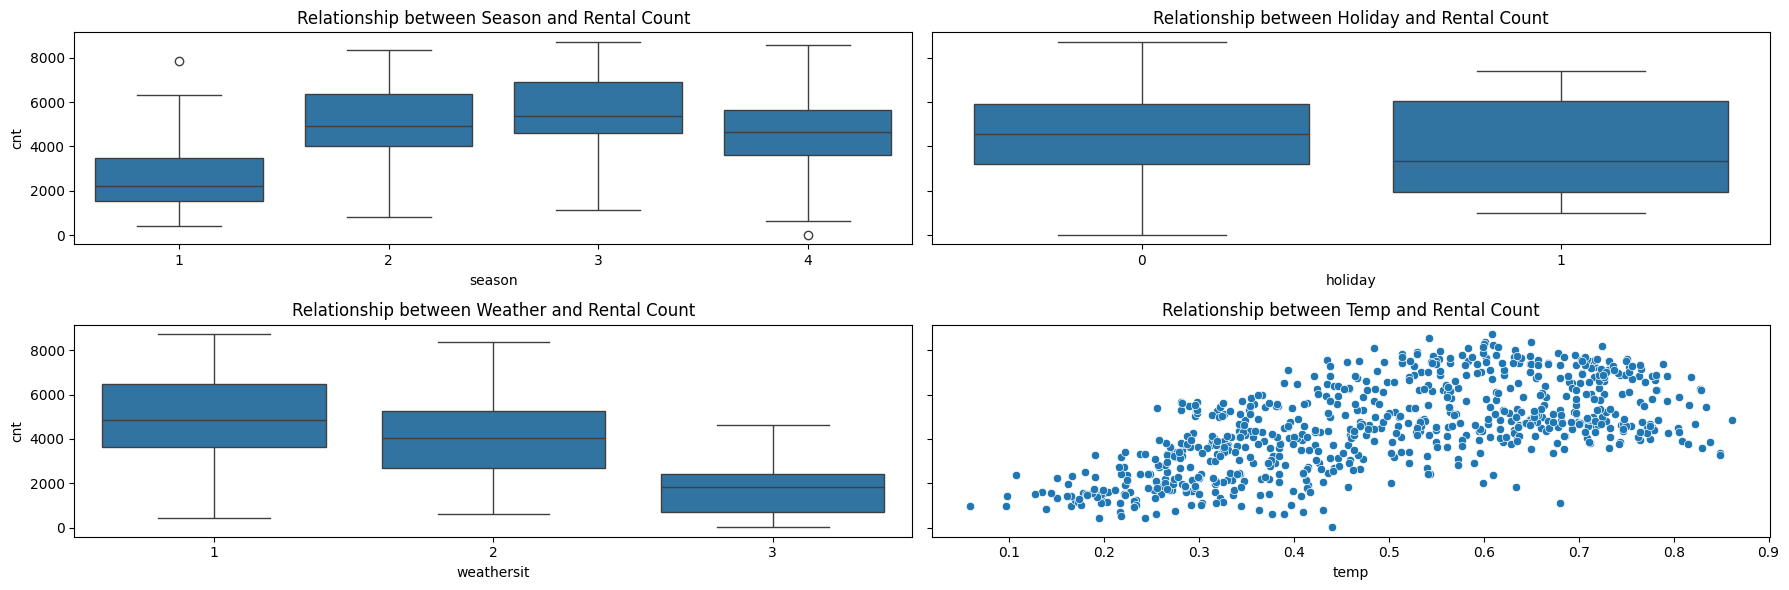

In [14]:
# Define the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 6), sharey=True)

# Visualizing the relationship between seasons and rental count using a box plot
sns.boxplot(x='season', y='cnt', data=df_day, ax=axes[0, 0])
axes[0, 0].set_title('Relationship between Season and Rental Count')

# Visualizing the relationship between holidays and rental count using a box plot
sns.boxplot(x='holiday', y='cnt', data=df_day, ax=axes[0, 1])
axes[0, 1].set_title('Relationship between Holiday and Rental Count')

# Visualizing the relationship between weather and rental count using a box plot
sns.boxplot(x='weathersit', y='cnt', data=df_day, ax=axes[1, 0])
axes[1, 0].set_title('Relationship between Weather and Rental Count')

# Visualizing the relationship between temp and rental count using a scatter plot
sns.scatterplot(x='temp', y='cnt', data=df_day, ax=axes[1, 1])
axes[1, 1].set_title('Relationship between Temp and Rental Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

> Apa hubungan suhu (temp) dengan jumlah pengguna biasa (casual) dan jumlah pengguna yang sudah terigistrasi (registered) pada setiap musim (season)?

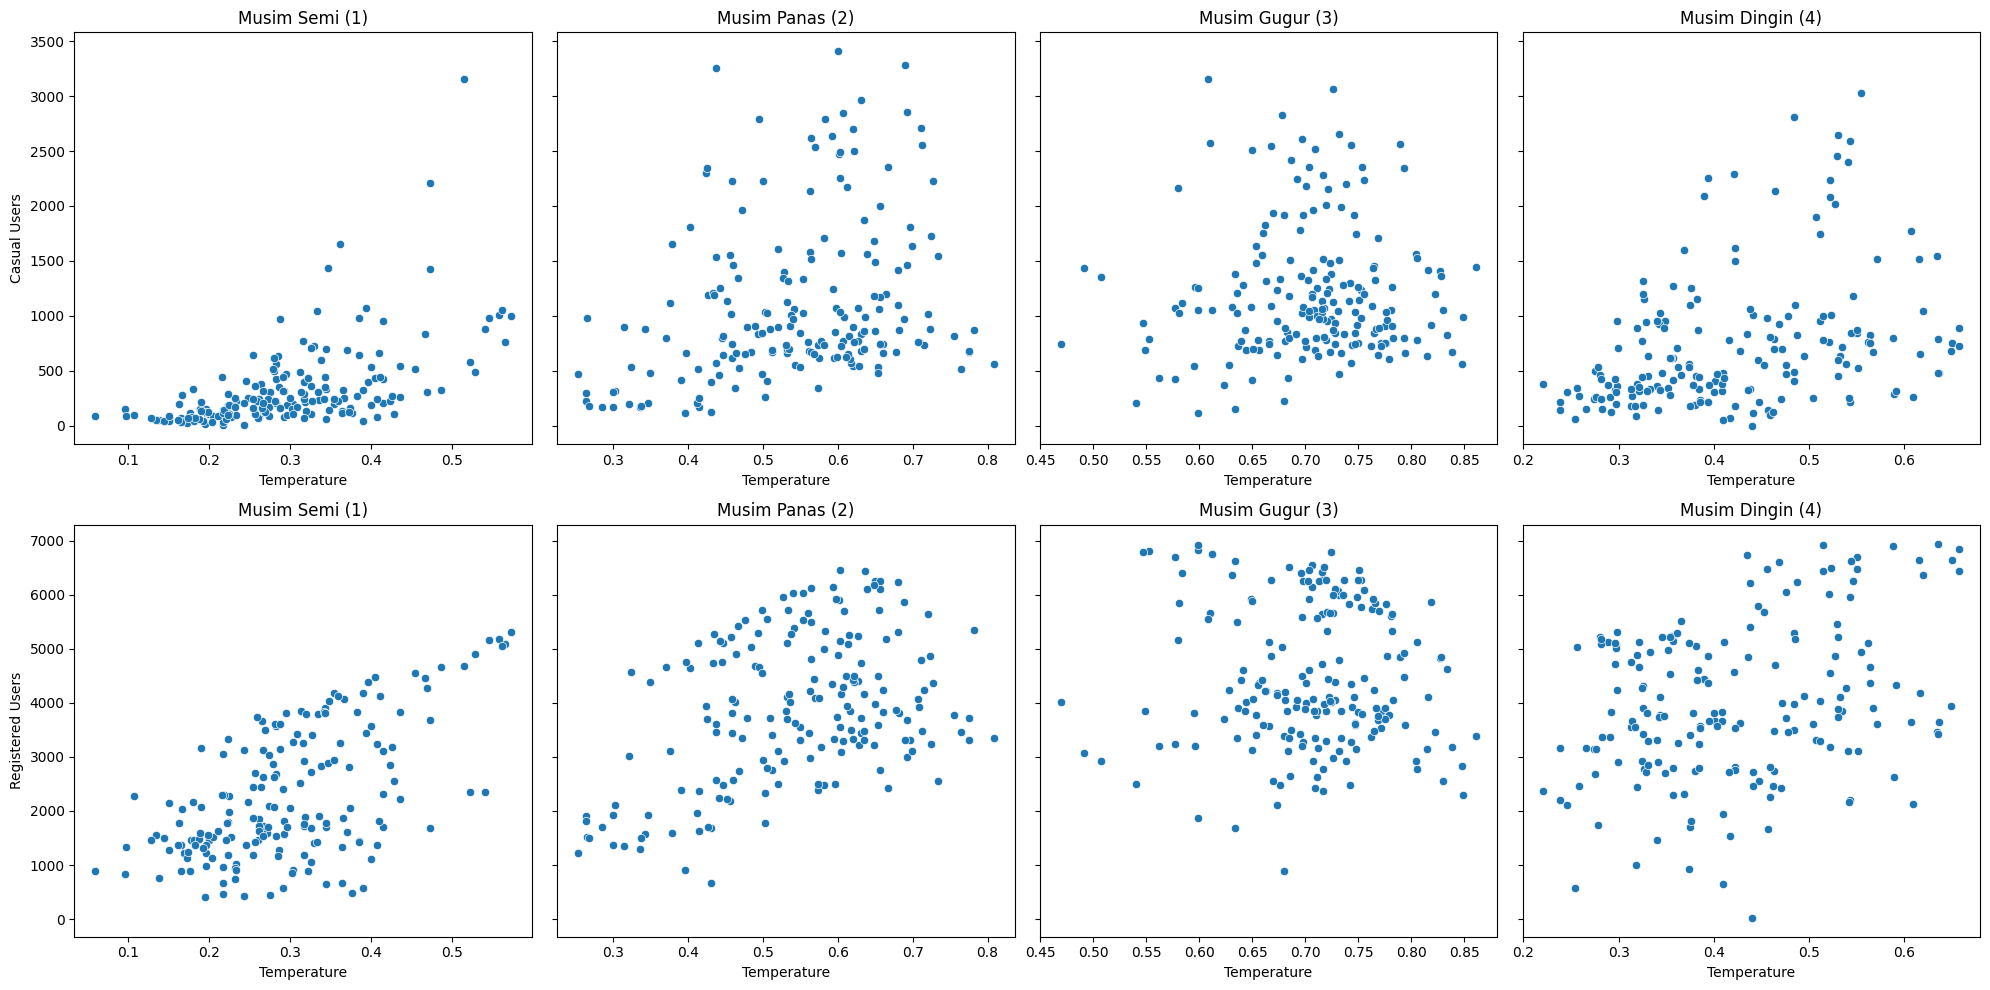

In [15]:
# Filter data for each season
season_data = {season: df_day[df_day['season'] == season] for season in range(1, 5)}

# Define season names in Indonesian
season_names = {
    1: "Musim Semi (1)",
    2: "Musim Panas (2)",
    3: "Musim Gugur (3)",
    4: "Musim Dingin (4)"
}

# Create subplots for casual and registered users
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey='row')

# Plot scatter plots for each season for casual and registered users
for i, (season, data) in enumerate(season_data.items()):
    # Plot for casual users
    sns.scatterplot(x='temp', y='casual', data=data, ax=axes[0, i])
    axes[0, i].set_title(season_names[season])
    axes[0, i].set_xlabel('Temperature')
    axes[0, i].set_ylabel('Casual Users')

    # Plot for registered users
    sns.scatterplot(x='temp', y='registered', data=data, ax=axes[1, i])
    axes[1, i].set_title(season_names[season])
    axes[1, i].set_xlabel('Temperature')
    axes[1, i].set_ylabel('Registered Users')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

> insight

1. **Musim Semi (1)** dan **Musim Dingin (4)** menunjukkan peningkatan yang jelas dalam jumlah pengguna biasa (`casual`) dan pengguna terdaftar (`registered`) seiring dengan peningkatan suhu. Ini menunjukkan bahwa lebih banyak orang cenderung menggunakan sepeda saat suhu lebih tinggi di musim-musim ini.

2. **Musim Panas (2)** menunjukkan distribusi yang luas untuk pengguna biasa (`casual`), tetapi hubungan yang lebih kuat dan positif antara suhu dan pengguna terdaftar (`registered`). Ini menunjukkan bahwa pengguna terdaftar lebih konsisten menggunakan sepeda dalam berbagai suhu selama musim panas.

3. **Musim Gugur (3)** menunjukkan sedikit penurunan dalam jumlah pengguna biasa (`casual`) pada suhu yang lebih tinggi, sedangkan pengguna terdaftar (`registered`) menunjukkan distribusi yang lebih konsisten tetapi dengan beberapa penurunan pada suhu tertentu. Ini menunjukkan bahwa faktor lain mungkin mempengaruhi penggunaan sepeda di musim gugur.

> Apa pengaruh humidity, temperature, dan windspeed terhadap jumlah sewa sepeda (cnt) setiap hari Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, dan Minggu?

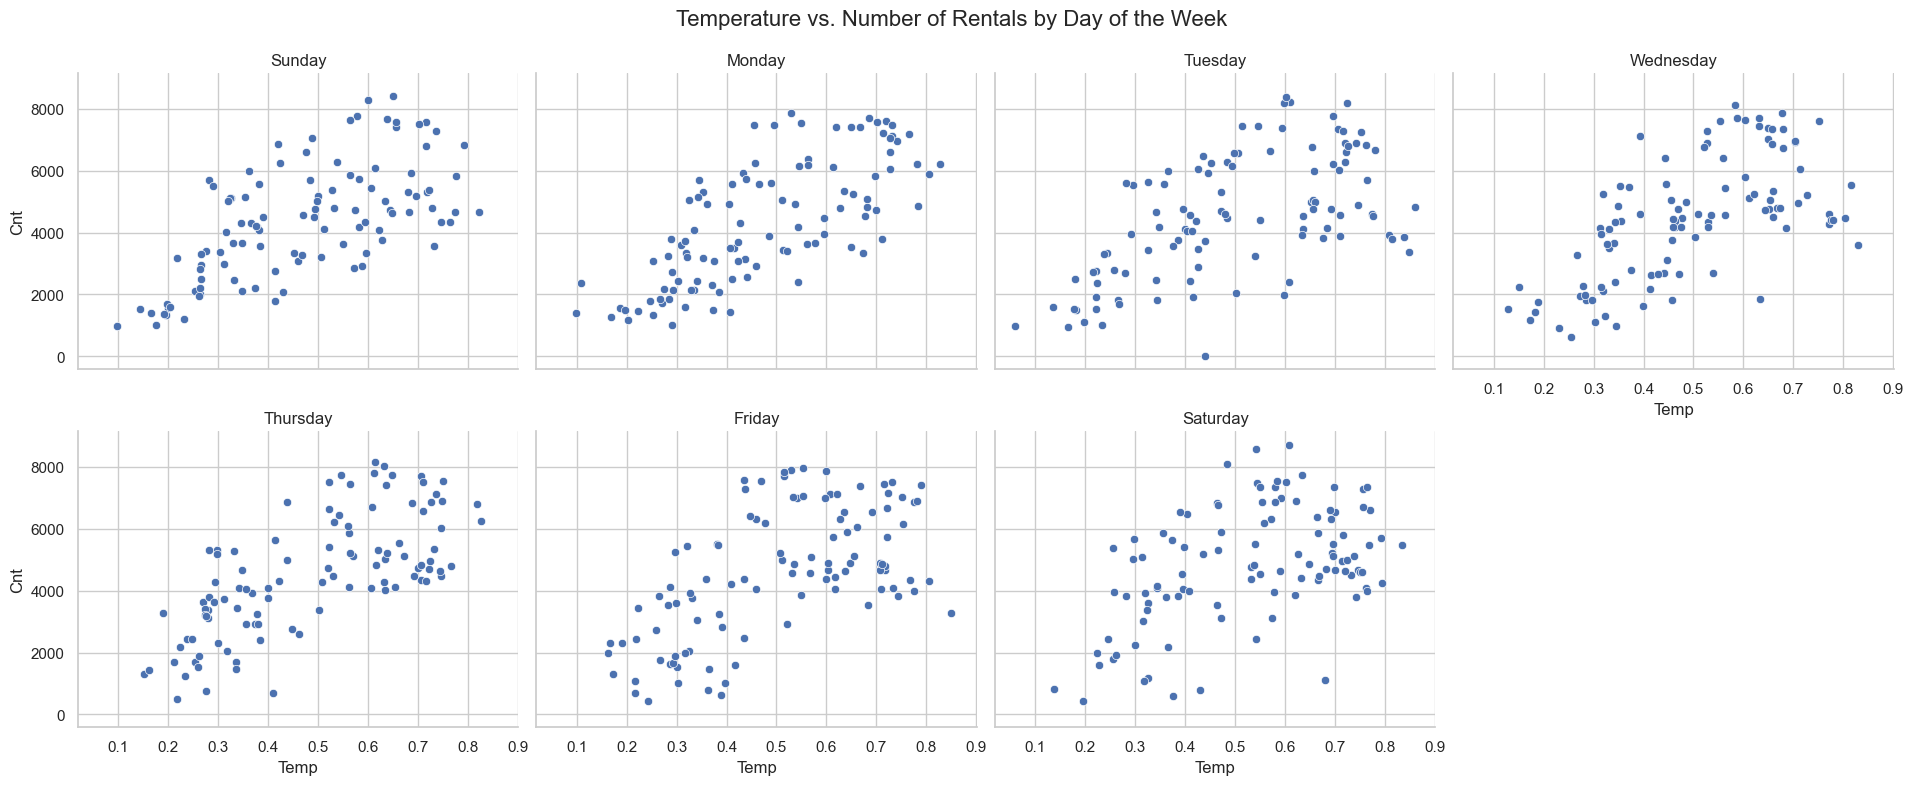

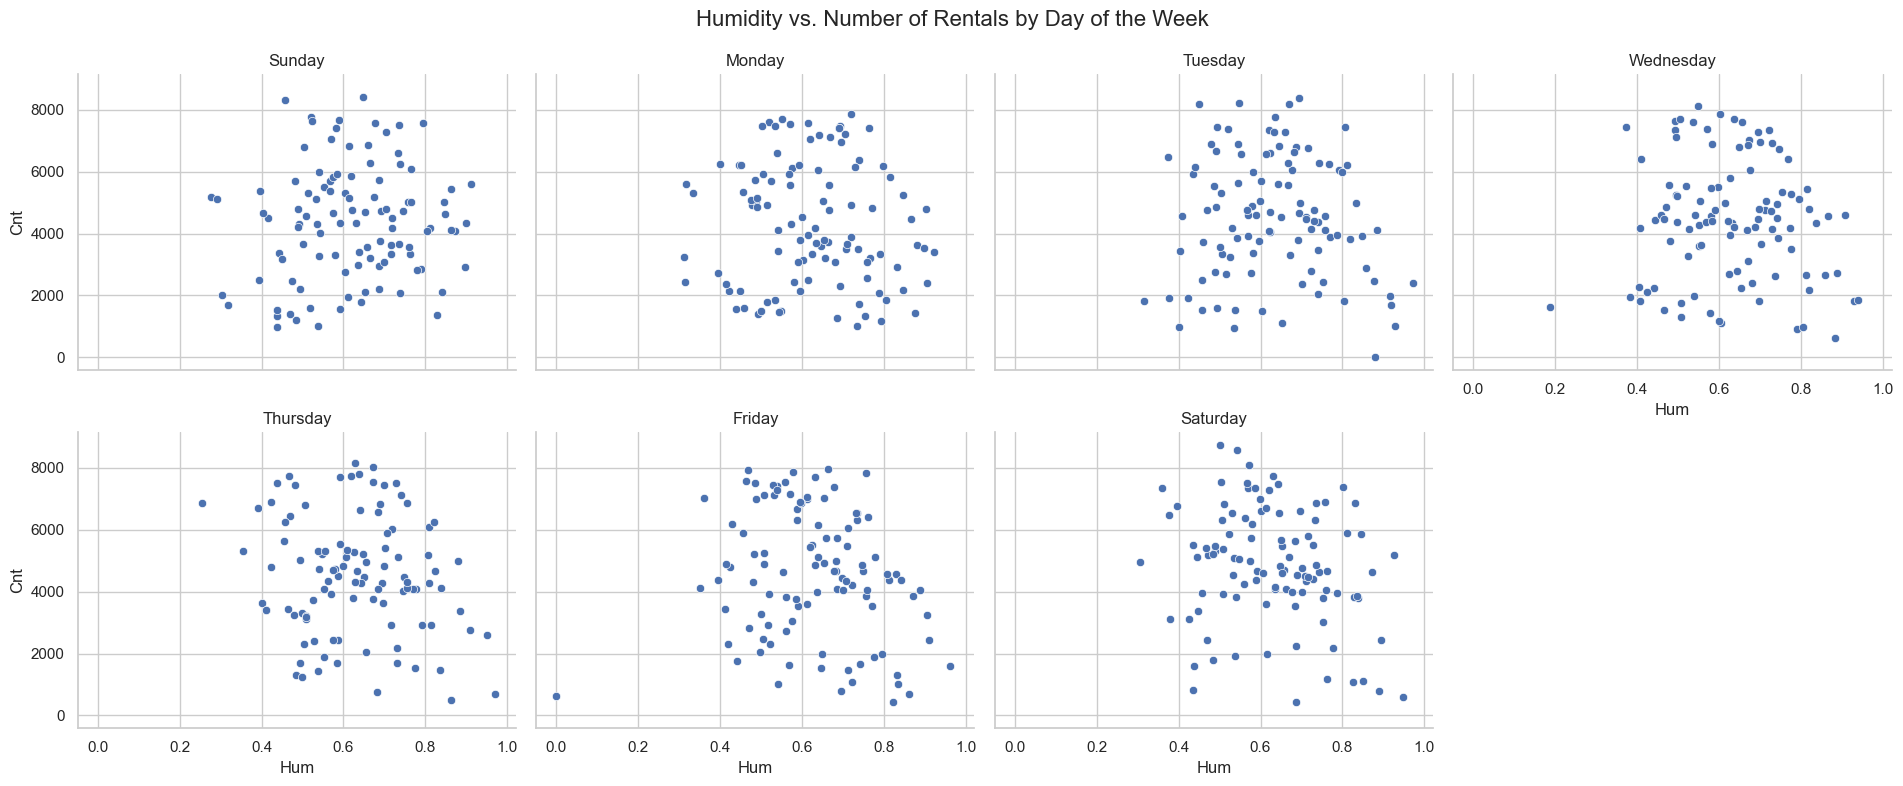

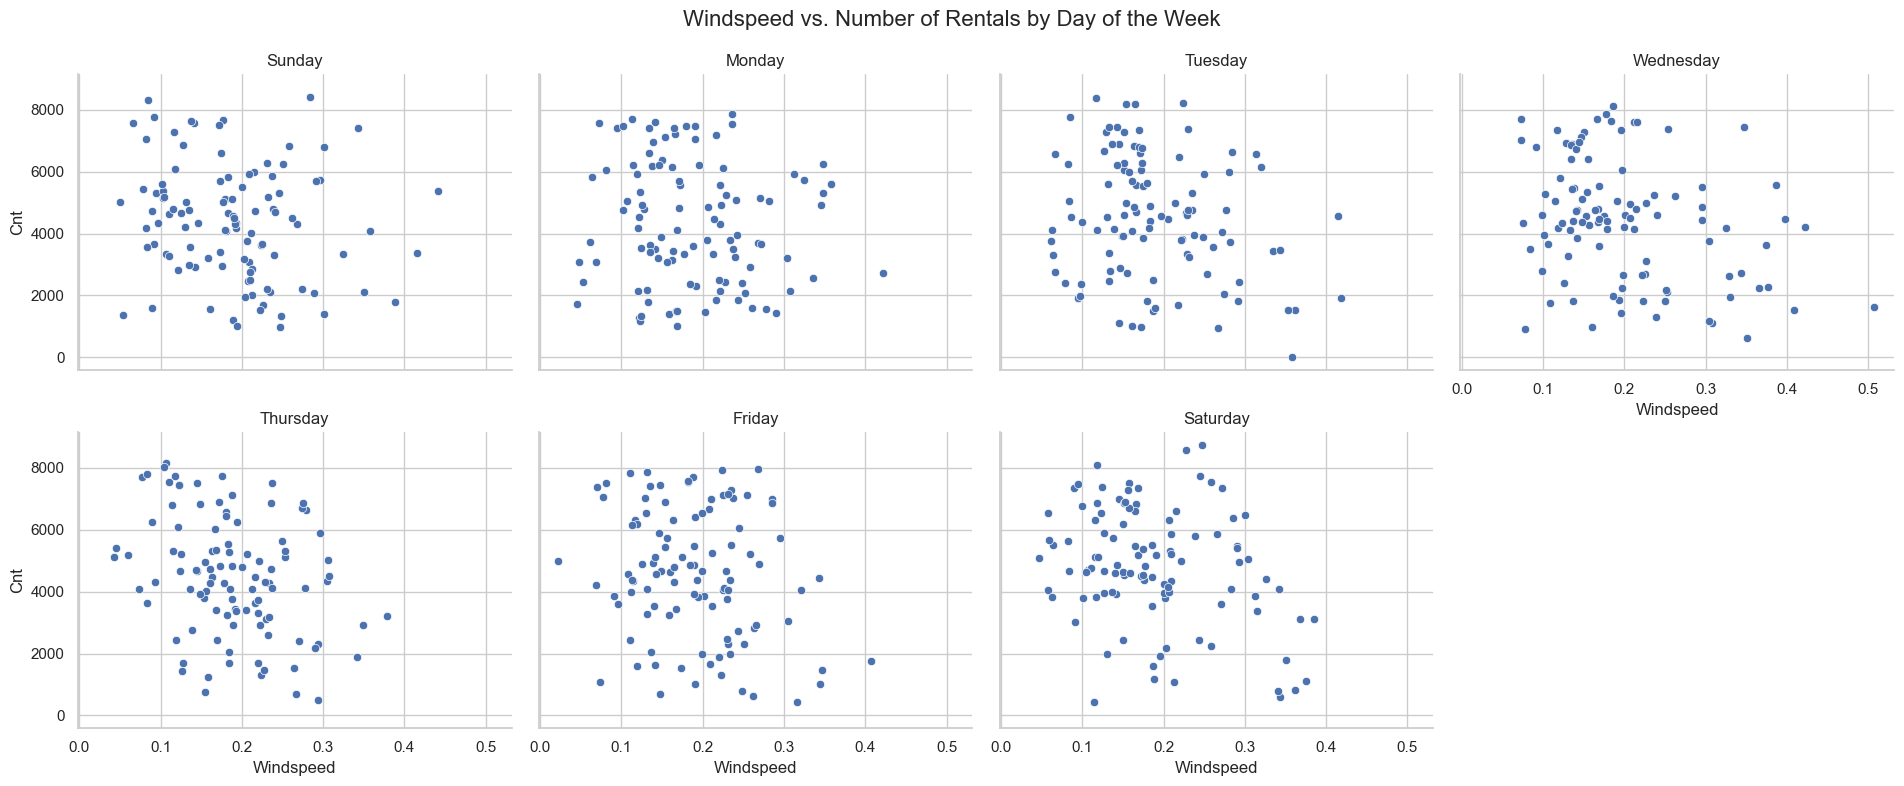

In [17]:
q_2 = df_day.groupby(["weekday", "hum", "temp", "windspeed"])["cnt"].sum().reset_index()
q_2["weekday"] = df_day["weekday"].apply(lambda x: calendar.day_name[x])

# Set up the seaborn style
sns.set(style="whitegrid")

# Create a FacetGrid to plot scatter plots for each day of the week
def scatter_plot_by_day(df, x_var, y_var, title):
    g = sns.FacetGrid(df, col="weekday", col_wrap=4, height=4, aspect=1.2)
    g.map(sns.scatterplot, x_var, y_var)
    
    g.set_titles("{col_name}")
    g.set_axis_labels(x_var, y_var)
    g.set_xlabels(f'{x_var.capitalize()}')
    g.set_ylabels(f'{y_var.capitalize()}')
    
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(title, fontsize=16)
    
    plt.show()

# Plot 1: Temperature vs. Number of Rentals by Day of the Week
scatter_plot_by_day(q_2, 'temp', 'cnt', 'Temperature vs. Number of Rentals by Day of the Week')

# Plot 2: Humidity vs. Number of Rentals by Day of the Week
scatter_plot_by_day(q_2, 'hum', 'cnt', 'Humidity vs. Number of Rentals by Day of the Week')

# Plot 3: Windspeed vs. Number of Rentals by Day of the Week
scatter_plot_by_day(q_2, 'windspeed', 'cnt', 'Windspeed vs. Number of Rentals by Day of the Week')

> insight
- Apabila dilihat berdasarkan Temperature, Humidity, dan Windspeed, dari Senin hingga Minggu, pada penyewa sepeda konsisten:
    - Untuk menyewa sepeda ketika suhu pada hari tersebut tinggi, terlihat pada distribusi yang diberikan
    - Humiditas penyewa sepeda cenderung stabil di atas 0.5
    - Terkait windspeed, penyewa sepeda memilih ketika hari tersebut tidak terlalu berangin kencang

## Analisis Lanjutan Clustering

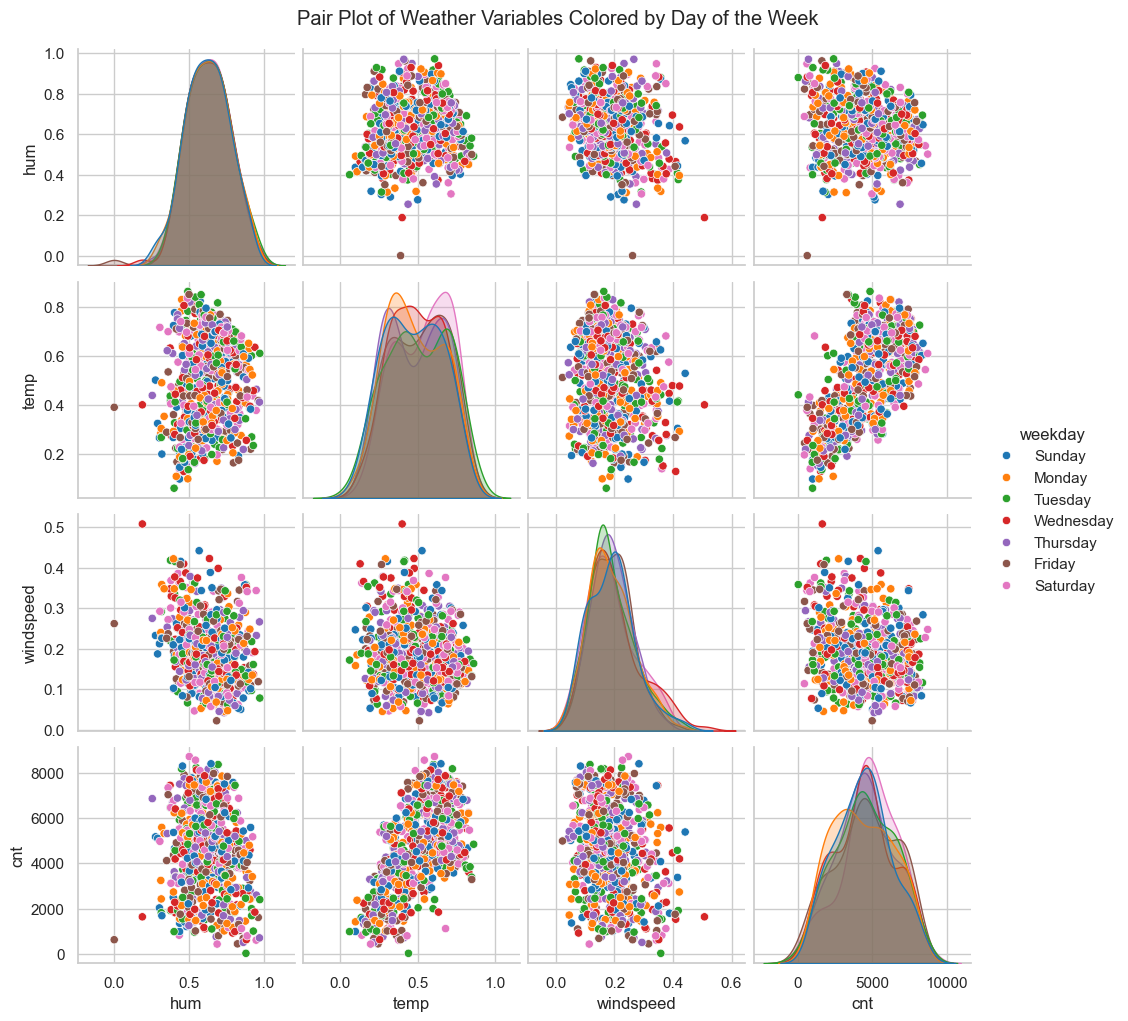

In [18]:
# Set up the seaborn style
sns.set(style="whitegrid")

# Create a pairplot
sns.pairplot(q_2, hue="weekday", palette="tab10")
plt.suptitle('Pair Plot of Weather Variables Colored by Day of the Week', y=1.02)
plt.show()

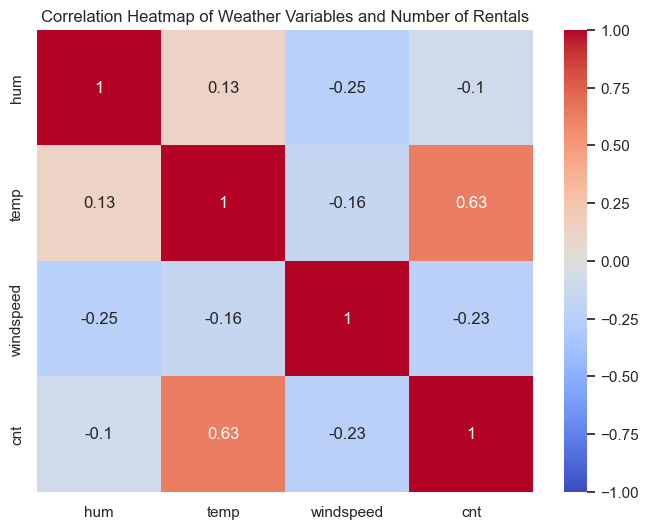

In [19]:
# Compute the correlation matrix
corr_matrix = q_2[['hum', 'temp', 'windspeed', 'cnt']].corr()

# Set up the seaborn style
sns.set(style="white")

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Weather Variables and Number of Rentals')
plt.show()

Summary for temp_cluster:
  temp_cluster  Count  Total Rentals  Average Rentals
0          Low    244         708582      2904.024590
1       Medium    244        1218725      4994.774590
2         High    243        1365372      5618.814815

Summary for hum_cluster:
  hum_cluster  Count  Total Rentals  Average Rentals
0         Low    244        1082072      4434.721311
1      Medium    244        1224341      5017.790984
2        High    243         986266      4058.707819

Summary for windspeed_cluster:
  windspeed_cluster  Count  Total Rentals  Average Rentals
0               Low    244        1203468      4932.245902
1            Medium    243        1121725      4616.152263
2              High    244         967486      3965.106557



/var/folders/8_/tf0673cx53j_z_bhct0txv5r0000gn/T/ipykernel_20187/3661174506.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(cluster_var)['cnt'].agg(['count', 'sum', 'mean']).reset_index()
/var/folders/8_/tf0673cx53j_z_bhct0txv5r0000gn/T/ipykernel_20187/3661174506.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(cluster_var)['cnt'].agg(['count', 'sum', 'mean']).reset_index()
/var/folders/8_/tf0673cx53j_z_bhct0txv5r0000gn/T/ipykernel_20187/3661174506.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version o

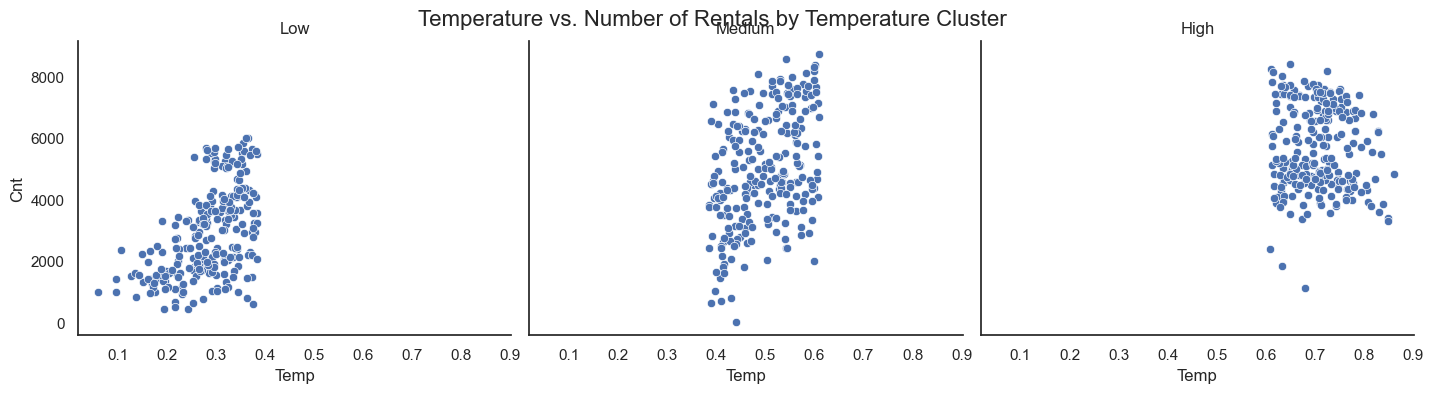

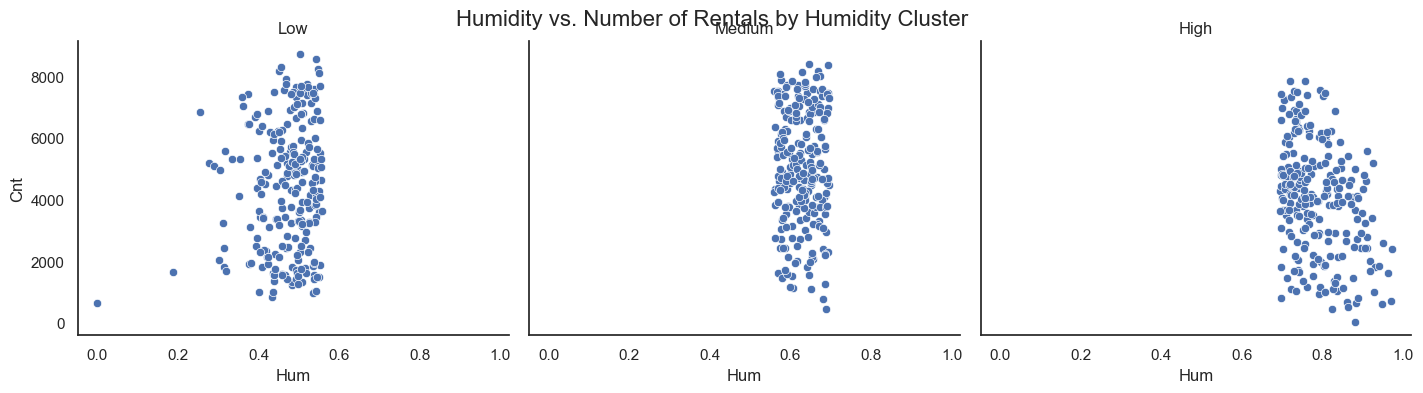

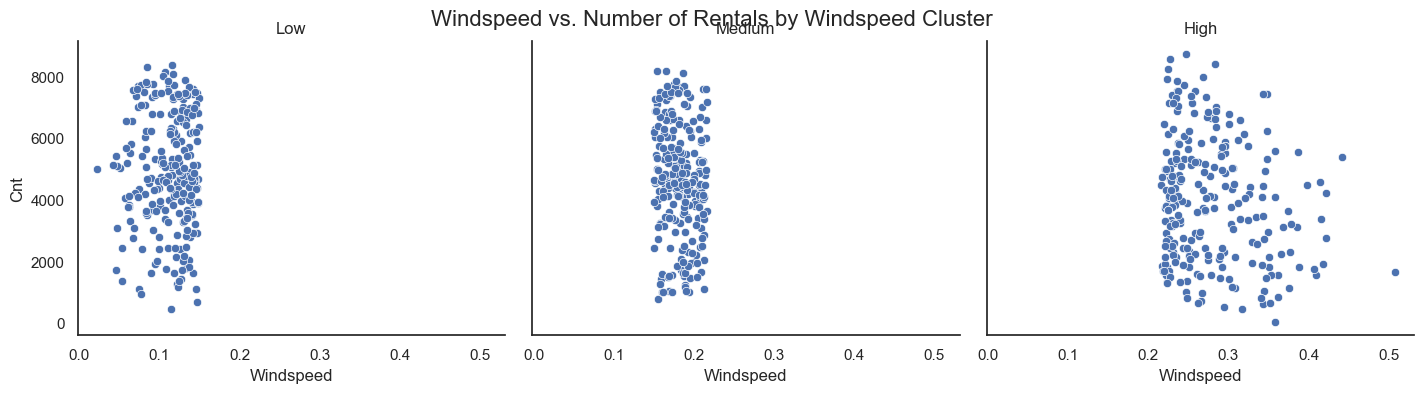

In [28]:
# Define clusters manually based on quantiles or ranges
q_2['temp_cluster'] = pd.qcut(q_2['temp'], q=3, labels=['Low', 'Medium', 'High'])
q_2['hum_cluster'] = pd.qcut(q_2['hum'], q=3, labels=['Low', 'Medium', 'High'])
q_2['windspeed_cluster'] = pd.qcut(q_2['windspeed'], q=3, labels=['Low', 'Medium', 'High'])

# Function to calculate and print count summary for each cluster
def print_cluster_summary(df, cluster_var):
    print(f"Summary for {cluster_var}:")
    summary = df.groupby(cluster_var)['cnt'].agg(['count', 'sum', 'mean']).reset_index()
    summary.columns = [cluster_var, 'Count', 'Total Rentals', 'Average Rentals']
    print(summary)
    print()

# Print summaries for each cluster
print_cluster_summary(q_2, 'temp_cluster')
print_cluster_summary(q_2, 'hum_cluster')
print_cluster_summary(q_2, 'windspeed_cluster')

# Create a FacetGrid to plot scatter plots for each cluster
def scatter_plot_by_cluster(df, x_var, y_var, title, cluster_var):
    g = sns.FacetGrid(df, col=cluster_var, col_wrap=3, height=4, aspect=1.2)
    g.map(sns.scatterplot, x_var, y_var)
    
    g.set_titles("{col_name}")
    g.set_axis_labels(x_var, y_var)
    g.set_xlabels(f'{x_var.capitalize()}')
    g.set_ylabels(f'{y_var.capitalize()}')
    
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(title, fontsize=16)
    
    plt.show()

# Plot clusters based on temperature
scatter_plot_by_cluster(q_2, 'temp', 'cnt', 'Temperature vs. Number of Rentals by Temperature Cluster', 'temp_cluster')

# Plot clusters based on humidity
scatter_plot_by_cluster(q_2, 'hum', 'cnt', 'Humidity vs. Number of Rentals by Humidity Cluster', 'hum_cluster')

# Plot clusters based on windspeed
scatter_plot_by_cluster(q_2, 'windspeed', 'cnt', 'Windspeed vs. Number of Rentals by Windspeed Cluster', 'windspeed_cluster')

/var/folders/8_/tf0673cx53j_z_bhct0txv5r0000gn/T/ipykernel_20187/3595424876.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(cluster_var)['cnt'].agg('sum').reset_index()
/var/folders/8_/tf0673cx53j_z_bhct0txv5r0000gn/T/ipykernel_20187/3595424876.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x=cluster_var, y='Total Rentals', palette="viridis", ax=ax)
/var/folders/8_/tf0673cx53j_z_bhct0txv5r0000gn/T/ipykernel_20187/3595424876.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed

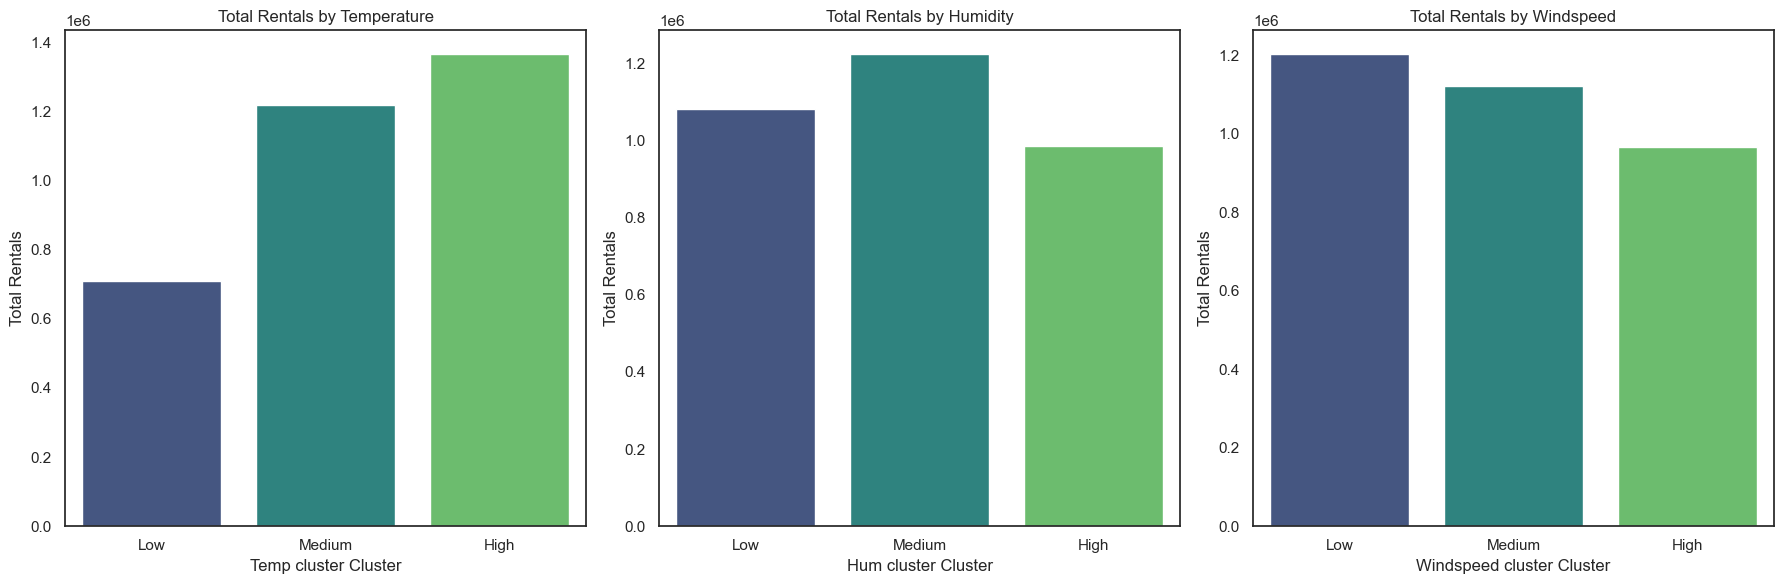

In [30]:
# Aggregate data
q_2 = df_day.groupby(["weekday", "hum", "temp", "windspeed"])["cnt"].sum().reset_index()

# Define clusters manually based on quantiles or ranges
q_2['temp_cluster'] = pd.qcut(q_2['temp'], q=3, labels=['Low', 'Medium', 'High'])
q_2['hum_cluster'] = pd.qcut(q_2['hum'], q=3, labels=['Low', 'Medium', 'High'])
q_2['windspeed_cluster'] = pd.qcut(q_2['windspeed'], q=3, labels=['Low', 'Medium', 'High'])

# Function to create a bar chart for clusters
def plot_cluster_total_rentals(df, cluster_var, ax, title):
    # Calculate summary statistics
    summary = df.groupby(cluster_var)['cnt'].agg('sum').reset_index()
    summary.columns = [cluster_var, 'Total Rentals']
    
    # Plot Total Rentals
    sns.barplot(data=summary, x=cluster_var, y='Total Rentals', palette="viridis", ax=ax)
    ax.set_title(f'Total Rentals by {title}')
    ax.set_xlabel(f'{cluster_var.replace("_", " ").capitalize()} Cluster')
    ax.set_ylabel('Total Rentals')
    ax.set_yscale('linear')  # Ensure y-axis scale is linear for accurate representation

# Create a figure with 1 row and 3 columns for bar charts
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot bar charts for each cluster in a single row and 3 columns
plot_cluster_total_rentals(q_2, 'temp_cluster', ax[0], 'Temperature')
plot_cluster_total_rentals(q_2, 'hum_cluster', ax[1], 'Humidity')
plot_cluster_total_rentals(q_2, 'windspeed_cluster', ax[2], 'Windspeed')

# Adjust layout
plt.tight_layout()
plt.show()

> insight

Informasi:
- Rentang temperature adalah 0.1 hingga 0.9
- Rentang humifity adalah 0 hingga 1
- Rentang windspeed adalah 0 hingga 0.5

Berdasarkan bar chart di atas, dapat disimpulkan bahwa pesewa sepeda cenderung bersepeda pada:
1. Temperature yang tinggi, yakni di atas 0.6
2. Humidity yang medium, yakni pada 0.6 hingga 0.7
3. Windspeed yang tinggi, yakni di atas 0.2

## Conclusion

- Dapat disimpulkan bahwa sebenarnya pola dari casual user dan registeres user cenderung sama berdasarkan suhu yang ada pada setiap musim yang terjadi. Pada musim semi dan dingin, mereka cenderung bersepeda ketika suhu lebih tinggi. Sedangkan pada musim panas, keduanya cenderung bersepeda tanpa memperhatikan suhu, hal ini diasumsikan bahwa suhu panas berada di setiap waktu. Terakhir, pada musim gugur, terlihat adanya konsistensi untuk bersepeda pada suhu konsisten tinggi, tetapi ada juga distribusi ketika suhu rendah.

- Apabila dilihat berdasarkan Temperature, Humidity, dan Windspeed, dari Senin hingga Minggu, pada penyewa sepeda konsisten:
    - Untuk menyewa sepeda ketika suhu pada hari tersebut tinggi, terlihat pada distribusi yang diberikan
    - Humiditas penyewa sepeda cenderung stabil di atas 0.5
    - Terkait windspeed, penyewa sepeda memilih ketika hari tersebut tidak terlalu berangin kencang


- Kemudian, pada clustering pada temperature, humidity, dan windspeed, dapat disimpulkan bahwa kecenderungan pesepeda untuk bersepeda pada temperatur yang cenderung tinggi, humidity yang sedang, dan windspeed yang tinggi.